In [1]:
! pip install PyPDF2

In [2]:
import requests
res = requests.get('https://www-ws.gov.taipei/001/Upload/336/relfile/50513/8096043/5606e265-609f-4155-b5d1-8e2bbfcd3512.pdf')
with open('1.pdf', 'wb') as f:
    f.write(res.content)

In [16]:
! open 1.pdf

In [136]:
import PyPDF2 
key = '/Annots'
uri = '/URI'
ank = '/A'

pdfFileObj = open('1.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

pages = pdfReader.getNumPages()

for page in range(pages):

    pageSliced = pdfReader.getPage(page)
    pageObject = pageSliced.getObject()

    if pageObject.get(key):
        ann = pageObject[key]
        for a in ann:
            u = a.getObject()
            if u[ank].get(uri):
                print(u[ank][uri])
pdfFileObj.close() 

mailto:ct-2067@mail.taipei.gov.tw
https://www-ws.gov.taipei/001/Upload/336/relfile/50513/8095064/8ef4fb40-68bc-4576-b38a-0a0ea88a4b31.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/50513/8095064/8ef4fb40-68bc-4576-b38a-0a0ea88a4b31.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/50513/8095064/8ef4fb40-68bc-4576-b38a-0a0ea88a4b31.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/16016/102785/8ad9cf33-696f-47d6-b5c7-dfd8990c85c7.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/16016/102785/9b46aac8-28f5-4691-9718-dbda8e898f35.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/16016/102785/00d6ba34-85c9-427e-b430-50ad3d5cbbb9.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/16016/102785/5bc27fdc-a11f-4489-be45-242ad0b4135a.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/16016/102785/3fe5c6ce-a5d7-48b2-9472-abcf448f1fb2.pdf
https://www-ws.gov.taipei/001/Upload/336/relfile/50513/8095064/ffee9c69-e50f-46ee-8339-51e240e38cf2.pdf
https://www-ws.gov.taipei/001/Uploa

In [ ]:
pageObj = pdfReader.getPage(0) 
pageObj.extractText()

## Gensim

In [26]:
import pandas
movies = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/yahoo_movie.xlsx', index_col = 0)


In [104]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
tags = []
for idx, rec in movies[movies['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    tags.append(rec['status'])

In [105]:
corpus = [e.split() for e in corpus]

In [106]:
print(corpus[0])

['很', '好看', '的', '動作片', '，', '不會', '浪費', '錢', '跟', '時間', '。', '很', '久', '沒有', '這樣', '的', '探險', '片', '。', '可', '說', '是', '女版', '的', '印第安那', '瓊', '。', '女', '主角', '跟', '爸爸', '還', '有', '反派', '都', '演', '得到', '位', '。', '陸任', '的', '男', '配角', '常', '在', '港片', '看到', '，', '很帥', '。', '一時', '忘了', '名字', '。', '希望', '有', '續集', '。']


In [107]:
from gensim.models import word2vec
size = 50 #產生多少維度 
min_count = 5 #要算至少出現多少次數的字詞
workers = 1 # 使用多少個core 計算, -1 使用所有的core 進行計算 
window = 10 # 上下文的區間
iter = 300 # 神經網路訓練的迭代數
sample = 1e-5 # 取樣的數量
model = word2vec.Word2Vec(corpus,
                            workers = workers,
                            sample = sample,
                            size = size,
                            min_count=min_count,
                            window = window,
                            iter = iter)



In [108]:
model.wv.vectors.shape

(1002, 50)

In [109]:
model.wv.vectors[0:3,:]

array([[ 0.12762997,  0.5303168 , -0.62234044, -0.60618687,  0.756115  ,
        -0.12772621, -0.19132742, -0.6781962 , -0.87671065, -1.1073663 ,
         0.01898266,  0.31069058, -0.13355832, -0.23307273, -0.13045254,
        -0.03471555, -0.08019929,  0.09445205, -0.17208219, -0.41450098,
         0.26570448,  0.00464565,  0.4290397 ,  0.07025634, -0.72664213,
         0.16685782, -0.13455784,  0.22509165,  0.1108507 , -0.12536146,
        -0.0040577 ,  0.5137099 , -0.21307541,  0.19611573,  0.29448012,
        -0.1661248 ,  0.5464557 , -0.66120696,  0.3349199 , -0.5157874 ,
        -0.12013563,  0.581995  ,  0.21668555, -0.1718539 , -0.6463935 ,
         0.1960594 , -0.36786267, -0.5268289 , -0.05671521,  0.5723366 ],
       [ 0.06711203,  0.8197265 , -0.3948068 , -1.1396337 ,  0.8172342 ,
         0.97776496, -0.63301283, -1.4080275 , -1.0339624 , -0.97121674,
         0.15948543,  0.34075922, -0.06482862,  0.38454995, -1.0565836 ,
         0.68493   ,  0.00574914,  0.6811641 ,  0.

In [110]:
model.wv.get_vector('動作片')

array([ 0.12567164,  0.18812212, -0.40714726, -0.12278994,  0.1978706 ,
        0.01151139, -0.01208388, -0.3736106 , -0.5549068 , -0.49676013,
        0.05417802,  0.04369465, -0.00376279, -0.25843516, -0.16134262,
        0.1697721 , -0.14269106, -0.0518671 , -0.12541448, -0.17777812,
        0.45084777,  0.42216384,  0.23262171, -0.06892861, -0.51270765,
       -0.12308028, -0.16880341, -0.14232424, -0.17353006,  0.10966135,
        0.3774229 ,  0.1680801 , -0.19547255,  0.18661943,  0.4523179 ,
        0.21971253, -0.13547269, -0.28611144,  0.1786494 , -0.14793888,
       -0.192089  ,  0.3537329 ,  0.06525171,  0.19021207, -0.05836289,
       -0.4211401 ,  0.32242244,  0.03424368,  0.05813096,  0.27297047],
      dtype=float32)

In [111]:
model.most_similar('睡著')

[('錢', 0.9933583736419678),
 ('不要', 0.9928134083747864),
 ('片子', 0.9913234710693359),
 ('爆破', 0.9910339713096619),
 ('啥', 0.9901098608970642),
 ('幹嘛', 0.9872196912765503),
 ('去', 0.9872190356254578),
 ('浪費', 0.9862076044082642),
 ('很爛', 0.9855409264564514),
 ('看到', 0.9852445721626282)]

## 使用Word2Vec 做分類

In [112]:
model['睡著'].reshape((1, 50))

array([[ 0.12173396, -0.05995493, -0.39535558,  0.13440901,  0.0946437 ,
         0.0266117 ,  0.00876688, -0.2102844 , -0.47940588, -0.22039028,
         0.11421198, -0.18984787,  0.17103612, -0.3033379 , -0.07590737,
         0.09263772, -0.08755571, -0.2775939 , -0.11667819, -0.09629381,
         0.52023774,  0.50445074,  0.20213786, -0.07812747, -0.33761346,
        -0.04940372, -0.13639367, -0.28085458, -0.07240571,  0.264102  ,
         0.26298133, -0.04999724, -0.10046339,  0.0380233 ,  0.43544477,
         0.27610204, -0.36718175,  0.01235916,  0.23545572, -0.19153471,
        -0.10185621,  0.20598643, -0.04723601,  0.38824788,  0.11001113,
        -0.61464477,  0.5276687 ,  0.29550552,  0.08225878,  0.286318  ]],
      dtype=float32)

In [113]:
print(corpus[0])

['很', '好看', '的', '動作片', '，', '不會', '浪費', '錢', '跟', '時間', '。', '很', '久', '沒有', '這樣', '的', '探險', '片', '。', '可', '說', '是', '女版', '的', '印第安那', '瓊', '。', '女', '主角', '跟', '爸爸', '還', '有', '反派', '都', '演', '得到', '位', '。', '陸任', '的', '男', '配角', '常', '在', '港片', '看到', '，', '很帥', '。', '一時', '忘了', '名字', '。', '希望', '有', '續集', '。']


In [114]:
import numpy as np
vecs = np.zeros(size).reshape((1, size))
vecs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [115]:
cnt = 0
for w in corpus[0]:
    if w in model:
        vecs += model[w].reshape((1, size))
        cnt += 1
print(vecs/cnt)

[[ 0.14780172  0.22031877 -0.44174983 -0.24014872  0.33701625  0.07389053
  -0.06541561 -0.49600453 -0.65403456 -0.5213074   0.1118668   0.07283668
  -0.01384003 -0.20777846 -0.19479834  0.08089548 -0.08115672 -0.06660791
  -0.05436305 -0.26579796  0.34827352  0.31195078  0.17504261  0.03085494
  -0.50028479 -0.08943908 -0.14845524 -0.06602946 -0.00406235  0.05328111
   0.22570957  0.19511726 -0.22993891  0.17127948  0.38136316  0.08690887
   0.05932228 -0.26143566  0.21643811 -0.23682587 -0.12266216  0.42499394
   0.07694465  0.13949573 -0.21750667 -0.28282346  0.16184069 -0.03892849
  -0.01536705  0.31719712]]


In [116]:
import numpy as np

vecs = []
vec = np.zeros(size).reshape((1, size))

cnt = 0
for s in corpus:
    for w in s:
        if w in model:
            #print(w, model[w])
            vec += model[w].reshape((1, size))
            cnt += 1
    vecs.append(vec / cnt)

In [117]:
len(corpus)

980

In [118]:
len(vecs)

980

In [119]:
vecs[0].shape

(1, 50)

In [120]:
X = np.concatenate(vecs, axis = 0)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.2, random_state = 42)


In [126]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
clf = SVC(kernel = 'linear')
clf.fit(train_X, train_y)

clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [127]:
predicted = clf.predict(test_X)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,predicted)

0.6530612244897959

In [129]:
confusion_matrix(test_y,predicted)

array([[45, 36],
       [32, 83]])

## 迴歸分析

In [138]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/salary.csv', index_col=0)

In [139]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


## Jupyter Notebook Magic
- https://ethanww.github.io/2017/05/08/jupyter%E9%AD%94%E6%B3%95%E5%91%BD%E4%BB%A4/

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy [pylab.py:161]


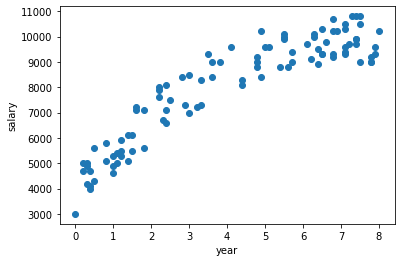

In [186]:
% pylab inline
from matplotlib import pyplot as plt
plt.scatter(df['year'], df['salary'])
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [150]:
from sklearn.linear_model import LinearRegression
X = df[['year']]
y = df['salary'].values
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
import numpy as np
test_X = np.array([3,5]).reshape(-1,1)
regr.predict(test_X)

array([7186.79230825, 8611.98058054])

In [155]:
# y = ax + b

In [154]:
regr.intercept_ # b

5049.0098998138365

In [156]:
regr.coef_ # a

array([712.59413615])

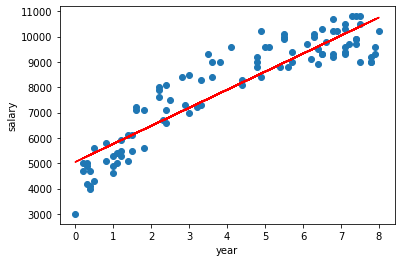

In [160]:
from sklearn.linear_model import LinearRegression
predicted = regr.predict(X)
plt.scatter(df['year'], df['salary'])
plt.plot(X,predicted, color = 'red')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2) # y = ax^2 + bx + c
X_   = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
regr.intercept_

3896.8009311708356

In [171]:
regr.coef_

array([   0.        , 1681.21265549, -119.70527702])

In [174]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)


In [181]:
#regr.predict(X2_)
#X2

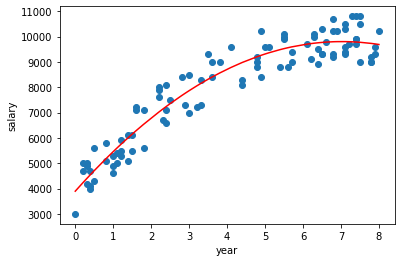

In [182]:
from sklearn.linear_model import LinearRegression
plt.scatter(df['year'], df['salary'])
plt.plot(X2,regr.predict(X2_), color = 'red')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [183]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=3) 
X_   = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
X3 = X.sort_values(['year'])
X3_ = poly_reg.transform(X3)


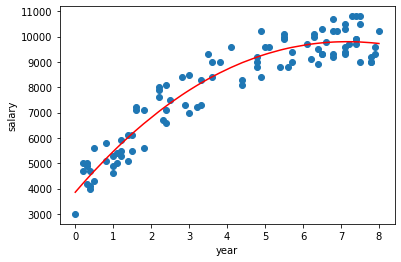

In [185]:
from sklearn.linear_model import LinearRegression
plt.scatter(df['year'], df['salary'])
plt.plot(X3,regr.predict(X3_), color = 'red')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()